<h1><center>19AIE205 PYTHON FOR MACHINE LEARNING</center></h1>
<h2><center>OBJECT DETECTION USING RCNN AND SVM</center></h2>

### Submitted By Team 4

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Ameen Ashadhullah M - CB.EN.U4AIE20004
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Bhoomika M - CB.EN.U4AIE20008
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Ghaayathri Devi K – CB.EN.U4AIE20017
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Gokul R - CB.EN.U4AIE20018


In [1]:
import os  #PROVIDES FUNCTION FOR INTERACTING WITH OPERATING SYSTEM
import cv2 #FOR HANDLING THE IMAGE AND IMAGE PROESSING
import keras #OPEN SOURCE NEURAL NETWORK WORKS ON TENSOR FLOW
import pandas as pd #DATA SCIENCE AND DATA ANALYTICS
import matplotlib.pyplot as plt #PLOTTING AND GRAPHICAL
import numpy as np #BASIC MATHEMATICAL COMPUTATION
import tensorflow as tf #HELPS TO CREATE A DEEP LEARNING MODEL
import h5py #TO HANDLE HDF5 FILES

DEFINING THE PATHS

In [2]:
path = "C:/Users/ameen/Documents/AMRITA/3rd sem/PML/____project/rcnn/final/Images"
annot = "C:/Users/ameen/Documents/AMRITA/3rd sem/PML/____project/rcnn/final/Airplanes_Annotations"

SHOWING AN EXAMPLE OF THE PREDICITON USING RCNN

airplane_170.jpg


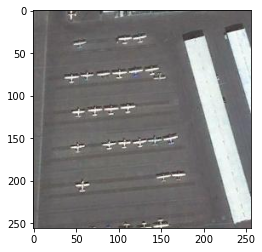

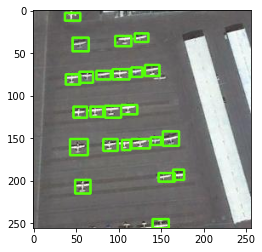

In [3]:
#Intalizing the index with the image no.
Index=170
#Concatenating the file name
filename = "airplane_"+str(Index)+".jpg" 
print(filename)

#Reading the image in the file path specified
img = cv2.imread(os.path.join(path,filename))
#Reading the Annotations file in the path specified
df = pd.read_csv(os.path.join(annot,filename.replace(".jpg",".csv")))
#printing the image 
plt.imshow(img)

#Getting the x and y coordinates for the box from the Annotation file
for row in df.iterrows():
    x1 = int(row[1][0].split(" ")[0])
    y1 = int(row[1][0].split(" ")[1])
    x2 = int(row[1][0].split(" ")[2])
    y2 = int(row[1][0].split(" ")[3])
    cv2.rectangle(img,(x1,y1),(x2,y2),(85,300,10), 2)

#Plotting the Box around the object
plt.figure()
plt.imshow(img)

cv2.ximgproc.segmentation.createSelectiveSearchSegmentation class is used for Selective search segmentation algorithm

In [4]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

[[209   0  47 256]
 [  0   0  37  29]
 [  0  63  47  29]
 ...
 [169   0  87 256]
 [145   0  79 144]
 [  0   0 109 164]]


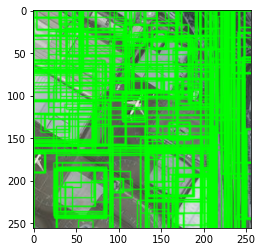

In [5]:
#Reads the image file frm the specified path
im = cv2.imread(os.path.join(path,"42850.jpg"))
#Set a image used by switch* functions to initialize the class.
ss.setBaseImage(im)
#
ss.switchToSelectiveSearchFast()

#Based on all images, graph segmentations and stragies, computes all possible rects and return them.
rects = ss.process()
print(rects)
# copies the image to imOut
imOut = im.copy()

#Gets all the rects coordinates and plots them.
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)

In [6]:
def get_iou(bb1, bb2):
  # assuring for proper dimension.
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
  # calculating dimension of common area between these two boxes.
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
  # if there is no overlap output 0 as intersection area is zero.
    if x_right < x_left or y_bottom < y_top:
        return 0.0
  # calculating intersection area.
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
  # individual areas of both these bounding boxes.
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
  # union area = area of bb1_+ area of bb2 - intersection of bb1 and bb2.
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [7]:
# At the end of below code we will have our train data in these lists
train_images=[]
train_labels=[]

In [8]:
for e,i in enumerate(os.listdir(annot)):
    try:
        # If the file name starts with "airplane"
        if i.startswith("airplane"):
            # The .csv in the file extension is replaced with .jpg
            filename = i.split(".")[0]+".jpg"
            #printing the filename
            print(e,filename)
            #Reading the image in the file path specified
            image = cv2.imread(os.path.join(path,filename))
            #Reading the Annotations file in the path specified
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            #Getting the x and y coordinates for the box from the Annotation file
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                #Appending the x and y coordinates in a dictnoary
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)   # setting given image as base image
            ss.switchToSelectiveSearchFast()     # running selective search on bae image 
            ssresults = ss.process()     # processing to get the outputs
            #Copies the image object to imout
            imout = image.copy()   
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            #
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:     # till 2000 to get top 2000 regions only
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})  # calculating IoU for each of the proposed regions
                        if counter < 30:       # getting only 30 psoitive examples
                            if iou > 0.70:     # IoU or being positive is 0.7
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1              # to insure we have collected all psotive examples
                        if falsecounter <30:      # 30 negatve examples are allowed only
                            if iou < 0.3:         # IoU or being negative is 0.3
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1             #to ensure we have collected all negative examples
                    if fflag == 1 and bflag == 1:  
                        print("inside")
                        flag = 1        # to signal the complition of data extaction from a particular image
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

17 airplane_001.jpg
inside
18 airplane_002.jpg
19 airplane_003.jpg
20 airplane_004.jpg
inside
21 airplane_005.jpg
inside
22 airplane_006.jpg
23 airplane_007.jpg
inside
24 airplane_008.jpg
25 airplane_009.jpg
26 airplane_010.jpg
27 airplane_011.jpg
28 airplane_012.jpg
inside
29 airplane_013.jpg
30 airplane_014.jpg
31 airplane_015.jpg
32 airplane_016.jpg
33 airplane_017.jpg
34 airplane_018.jpg
35 airplane_019.jpg
36 airplane_020.jpg
37 airplane_021.jpg
38 airplane_022.jpg
39 airplane_023.jpg
40 airplane_024.jpg
41 airplane_025.jpg
42 airplane_026.jpg
43 airplane_027.jpg
44 airplane_028.jpg
45 airplane_029.jpg
46 airplane_030.jpg
47 airplane_031.jpg
48 airplane_032.jpg
49 airplane_033.jpg
50 airplane_034.jpg
51 airplane_035.jpg
52 airplane_036.jpg
53 airplane_037.jpg
54 airplane_038.jpg
55 airplane_039.jpg
56 airplane_040.jpg
57 airplane_041.jpg
inside
58 airplane_042.jpg
59 airplane_043.jpg
60 airplane_044.jpg
61 airplane_045.jpg
inside
62 airplane_046.jpg
63 airplane_047.jpg
64 airplane

In [9]:
# conversion of train data into arrays for further training
X_new = np.array(train_images)
Y_new = np.array(train_labels)

In [10]:
from keras.layers import Dense
from keras import Model
from keras import optimizers

In [11]:
# For object detection and classification through layerwise computation
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
for layer in vgg.layers[:-2]:
  layer.trainable = False
x = vgg.get_layer('fc2')
last_output =  x.output
x = tf.keras.layers.Dense(1,activation = 'sigmoid')(last_output)  
model = tf.keras.Model(vgg.input,x)
model.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])



In [12]:
# The summary can be created by calling the summary() function on the model that returns a string that in turn can be printed.
# The summary is textual and includes information about:

# The layers and their order in the model.
# The output shape of each layer.
# The number of parameters (weights) in each layer.
# The total number of parameters (weights) in the model.

model.summary()

# Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. A model that is well-fitted produces more accurate outcomes.

model.fit(X_new,Y_new,batch_size = 64,epochs = 3, verbose = 1,validation_split=.05,shuffle = True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
svm_image = [];
svm_label = [];

In [14]:
for e,i in enumerate(os.listdir(annot)):
    try:
        # If the file name starts with "airplane"
        if i.startswith("airplane"):
            # The .csv in the file extension is replaced with .jpg
            filename = i.split(".")[0]+".jpg"
            #Printing the file names
            print(e,filename)
            #Reading the image in the file path specified
            image = cv2.imread(os.path.join(path,filename))
            #Reading the Annotations file in the path specified
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            #Getting the x and y coordinates for the box from the Annotation file
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3]) 
                #Appending the x and y coordinates in a dictnoary
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
                timage = image[x1:x2,y1:y2]
                #Resizing All the images to a defined size
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                #Appending the images to the svm_image
                svm_image.append(resized)
                #Appending the labels of the image to svm_image
                svm_label.append([0,1])
             # setting given image as base image
            ss.setBaseImage(image)
            # running selective search on bae image
            ss.switchToSelectiveSearchFast()
            # processing to get the outputs
            ssresults = ss.process()
            #Copies the image object to imout
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0: # till 2000 to get top 2000 regions only
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h}) # calculating IoU for each of the proposed regions
                        if falsecounter <5: # getting only 5 negative examples
                            if iou < 0.3: # IoU or being negative is 0.3
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                #Appending the images to the svm_image
                                svm_image.append(resized)
                                #Appending the labels of the image to svm_image
                                svm_label.append([1,0])
                                falsecounter += 1
                        else :
                            flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

17 airplane_001.jpg
18 airplane_002.jpg
19 airplane_003.jpg
20 airplane_004.jpg
21 airplane_005.jpg
22 airplane_006.jpg
23 airplane_007.jpg
24 airplane_008.jpg
25 airplane_009.jpg
26 airplane_010.jpg
27 airplane_011.jpg
28 airplane_012.jpg
29 airplane_013.jpg
30 airplane_014.jpg
31 airplane_015.jpg
32 airplane_016.jpg
33 airplane_017.jpg
34 airplane_018.jpg
35 airplane_019.jpg
36 airplane_020.jpg
37 airplane_021.jpg
38 airplane_022.jpg
39 airplane_023.jpg
40 airplane_024.jpg
41 airplane_025.jpg
42 airplane_026.jpg
43 airplane_027.jpg
44 airplane_028.jpg
45 airplane_029.jpg
46 airplane_030.jpg
47 airplane_031.jpg
48 airplane_032.jpg
49 airplane_033.jpg
50 airplane_034.jpg
51 airplane_035.jpg
52 airplane_036.jpg
53 airplane_037.jpg
54 airplane_038.jpg
55 airplane_039.jpg
56 airplane_040.jpg
57 airplane_041.jpg
58 airplane_042.jpg
59 airplane_043.jpg
60 airplane_044.jpg
61 airplane_045.jpg
62 airplane_046.jpg
63 airplane_047.jpg
64 airplane_048.jpg
65 airplane_049.jpg
66 airplane_050.jpg


## saving model

In [15]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [16]:
model.save("my_h5_model.h5")

In [17]:
l_model_h5 = keras.models.load_model("my_h5_model.h5")
l_model = keras.models.load_model("my_model")

In [18]:
print(l_model.get_config() == model.get_config())

True


In [19]:
print(l_model_h5.get_config() == model.get_config())

True


In [20]:
#adding svm to last layer,we will remove the last layer and as the last 2 models was not trainable in the 1st model here we will add svm to last 2 layers and will train them
x =model.get_layer('fc2').output
Y = tf.keras.layers.Dense(2)(x)
final_model = tf.keras.Model(model.input,Y)
final_model.compile(loss='hinge',
              optimizer='adam',
              metrics=['accuracy'])
final_model.summary()
final_model.load_weights('my_h5_model.h5', by_name=True)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [21]:
# finally we are fitting and train the model with 20 epochs
hist_final = final_model.fit(np.array(svm_image),np.array(svm_label),batch_size=32,epochs = 20,verbose = 1,shuffle = True,validation_split = 0.05)

Epoch 1/20
167/167 [==============================] - 695s 4s/step - loss: 0.6659 - accuracy: 0.7294 - val_loss: 0.7504 - val_accuracy: 0.6263
Epoch 2/20
167/167 [==============================] - 928s 6s/step - loss: 0.5284 - accuracy: 0.7713 - val_loss: 0.7361 - val_accuracy: 0.6370
Epoch 3/20
167/167 [==============================] - 1177s 7s/step - loss: 0.4724 - accuracy: 0.8000 - val_loss: 0.7358 - val_accuracy: 0.6655
Epoch 4/20
167/167 [==============================] - 1082s 6s/step - loss: 0.4336 - accuracy: 0.8219 - val_loss: 0.7683 - val_accuracy: 0.7117
Epoch 5/20
167/167 [==============================] - 720s 4s/step - loss: 0.3868 - accuracy: 0.8406 - val_loss: 0.7403 - val_accuracy: 0.6940
Epoch 6/20
167/167 [==============================] - 732s 4s/step - loss: 0.3544 - accuracy: 0.8539 - val_loss: 0.7621 - val_accuracy: 0.7438
Epoch 7/20
167/167 [==============================] - 727s 4s/step - loss: 0.3175 - accuracy: 0.8691 - val_loss: 0.7482 - val_accuracy: 0.71

## saving final model

In [22]:
final_model.save("fin_model")
final_model.save("fin_h5_model.h5")

INFO:tensorflow:Assets written to: fin_model\assets


In [23]:
l_fin_model_h5 = keras.models.load_model("fin_h5_model.h5")
l_fin_model = keras.models.load_model("fin_model")

In [24]:
print(l_fin_model.get_config() == final_model.get_config())

True


In [25]:
print(l_fin_model_h5.get_config() == final_model.get_config())

True


In [26]:
### PLOTTING

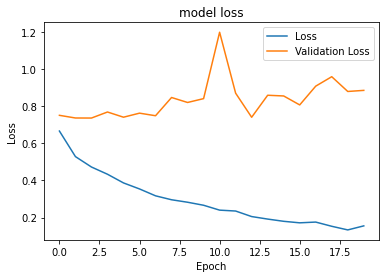

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
plt.plot(hist_final.history['loss'])
plt.plot(hist_final.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

0 [[-0.95339614  0.9962526 ]]
1 [[ 6.309066 -6.156432]]
2 [[ 1.8611535 -1.6347631]]
3 [[-0.23102656  0.26116407]]
4 [[ 3.4487553 -3.3755305]]
5 [[-0.5596184  0.5770244]]
6 [[ 5.1030517 -4.864478 ]]
7 [[-0.3411736   0.34123874]]
8 [[-0.06704099  0.09032804]]
9 [[-5.07469    5.0534225]]
10 [[-0.3951628   0.41282725]]
11 [[ 6.3888087 -6.4570675]]
12 [[ 0.775805   -0.75543576]]
13 [[ 6.5270653 -6.3699455]]
14 [[ 3.361725  -3.2180521]]
15 [[-4.792223  4.791295]]
16 [[-0.09838206  0.11770827]]
17 [[-1.2168206  1.2390999]]
18 [[-1.9806737  2.0325627]]
19 [[ 7.0926423 -7.1581078]]
20 [[-0.7415333   0.92859143]]
21 [[ 11.268065 -11.366391]]
22 [[ 0.6937352  -0.67388177]]
23 [[ 6.813528 -6.652695]]
24 [[ 1.1680994 -1.1515431]]
25 [[ 8.931741 -8.786428]]
26 [[-0.5728311   0.56407946]]
27 [[-0.9796781  1.0074323]]
28 [[-3.1895604  3.240692 ]]
29 [[-4.2412596  4.276059 ]]
30 [[ 2.8607206 -2.6603153]]
31 [[-4.276557  4.303374]]
32 [[-6.8356543  6.8881183]]
33 [[ 7.262119  -7.1240034]]
34 [[-0.568303

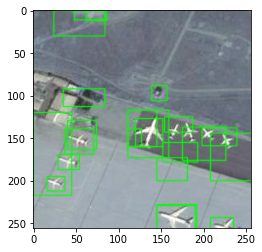

In [18]:
###########  it's time for test a image    ##########
image = cv2.imread(os.path.join(path,'airplane_020.jpg'))
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()

imOut = image.copy()
boxes = []
count = 0
for e,result in enumerate(ssresults):
    if e < 50:
        x,y,w,h = result
        timage = imout[x:x+w,y:y+h]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        resized = np.expand_dims(resized,axis = 0)
        out = l_fin_model.predict(resized)
        print(e,out)
        if(out[0][0]<out[0][1]):
            boxes.append([x,y,w,h])
            count+=1

for box in boxes:
    x, y, w, h = box
    print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)